In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from scipy import stats
import statsmodels as sm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
# load data
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습'

train_df = pd.read_csv(os.path.join(save_dir, 'seg1_train_df.csv'))
valid_df = pd.read_csv(os.path.join(save_dir, 'seg1_valid_df.csv'))
test_df = pd.read_csv(os.path.join(save_dir, 'seg1_test_df.csv'))

In [3]:
print('trn: ', train_df.shape)
print('val: ', valid_df.shape)
print('tst: ', test_df.shape)

trn:  (37539, 1929)
val:  (12566, 1929)
tst:  (12752, 1929)


In [4]:
train_df.head(2)

,no,BAD,신청월,직군그룹,근속기간1,웰컴_소득구간,심사원장_소득구간,AS0000136,AS0000137,AS0000138,AS0000139,B12000100,B12000200,B14000600,B22000100,B22000200,B22000300,B24000600,B28000001,B29000110,B32000200,B34000600,B41090101,B41100100,B41100200,B41100300,B41100400,B41110200,B41110400,B4E000002,BE0000021,BS0000058,BS0000114,BS0000145,BS0000146,BS0000171,BS0000917,C00000029,C11060700,C11060600,C11060400,C11060500,C11060800,CA0000601,CA0000602,CA0000603,CA0000604,CF0300309,CF0600309,CF1200309,...,LU0024608_1_2,GU0024201_1_2,GU0024001_1_2,LU0024002_1_3,LU0024202_1_3,LU0024608_1_3,GU0024201_1_3,GU0024001_1_3,LU0024002_1_4,LU0024202_1_4,LU0024608_1_4,GU0024201_1_4,GU0024001_1_4,P2O000500_1_s9,P2O000500_1_s3,P2E000500_1_s6,P2E000500_1_s3,P2E000500_1_s12,P27000100_1_s9,P27000100_1_s6,P27000100_1_s3,P27000100_1_s12,P21010500_1_s9,P21010500_1_s6,P21010500_1_s12,LA0000227_1_s6,LA0000227_1_s3,LA0000222_1_s9,LA0000222_1_s6,LA0000222_1_s3,LA0000222_1_s12,LA0000204_1_s9,LA0000203_1_s9,LA0000203_1_s6,LA0000001_1_s3,LA0000020_1_s3,LA0000203_1_s3,P21010500_1_s3,LA0000001_1_s6,LA0000204_1_s6,P2O000500_1_s6,LA0000001_1_s9,LA0000020_1_s9,LA0000227_1_s9,P2E000500_1_s9,LA0000001_1_s12,LA0000020_1_s12,LA0000204_1_s12,LA0000227_1_s12,P2O000500_1_s12
0,2,0,201612,NaN,2.0,2.0,0.0,-1,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2814,0,0,0,0,0,3347,2094,3347,742,1856,2825,2253,...,71,0,0,3,8988,41,0,0,3,9000,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.61,-15.3,-548.67,-6.32,-17.7,-375.57,453.52,-548.67,-6.32,0.0,0.0,-17.7,0.0,0.25,537.61,0.0,0.16,0.16,453.52,0.0,0.1,0.1,447.5,447.5,0.0
1,3,0,201612,NaN,5.0,3.0,0.0,-1,47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1843,1079,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 선정 변수 제외 drop
# load layout
layout = pd.read_excel(os.path.join(save_dir, '단변량모듈사용_단변량결과.xlsx'))
layout.head(1)

,Variable,NO,aggvar_name,group_code1,group_code2,group_2,min_value,max_value,median,is_na,min_check,max_check,date_var,cate_var,welc_can_use,ks_trn,ks_val,ks_tst,ar_trn,ar_val,ar_tst,iv_trn,iv_val,iv_tst,val_psi,val_psi_안정성,tst_psi,tst_psi_안정성,val_2019_psi,val_2019_psi_안정성,PSI_선정여부,iv_top_YN,변별력,iv_stable_YN,안정성,상관분석
0,A5RCLSDT011100,1488,총대출공여,웰컴항목,웰컴정보,6,1.0,6.0,1.0,0,0,0,0,0,활용 가능,0.133226,0.043998,0.152178,0.133226,0.043998,0.152178,0.000901,0.0001,0.001029,3.425760e-08,Y,0.000038,Y,0.002853,Y,Y,N,N,N,N,N


In [9]:
select_variables = layout['Variable'][layout['상관분석'] == 'Y'].tolist()
select_variables.insert(0, 'BAD')
select_variables.insert(0, 'no')

In [10]:
print('select_variables: ', len(select_variables))

select_variables:  40


In [11]:
train_df = train_df[select_variables]
valid_df = valid_df[select_variables]
test_df = test_df[select_variables]

In [12]:
print('trn: ', train_df.shape)
print('val: ', valid_df.shape)
print('tst: ', test_df.shape)

trn:  (37539, 40)
val:  (12566, 40)
tst:  (12752, 40)


In [13]:
train_df.head(2)

,no,BAD,A5RCLSRL027000,A5RCLSRL027300,A5RCLSRL027500,A5RCLSRL078700,A5RCLSRL091300,C00000083,CF1231601,EH0001601_1,EH1201002_1,EW0001601_1,IDT000003,IDT000004_1,LA0000001_s9,LA0000020_s12,LA0000203_s12,LA0000203_s6,LA0000204_s3,LA0000222_s12,LA0000227_s9,LA0600203,LA1200203,LA1214204,LA1299203,LA2400901,LC0000901,LC009920E,LH000000E,LS0000058,LS0000607,LU0000902_1,P11252001_1,P2E000500_12_1,P32002500,P94003900,PE1000010,PE1000011,PS0000188,PS0001728
0,2,0,32.68,34.83,9.8,0,37566,2094,11,131,1,515,132,189,0.15,-0.02,-1441.21,-78.57,-282.1,-464.29,737.47,7100,8000,5000,5000,14,1980,4871,100,6000,100,4722,0,0.0,0,0,0,0,0,0
1,3,0,0.00,17.86,80.7,0,22595,0,0,260,1,237,89,89,0.13,0.08,412.09,1071.43,-717.8,412.09,0.00,5000,5000,0,0,45,10000,17595,89,31700,4758,10000,0,0.0,0,0,0,0,0,0


In [14]:
train_df[train_df.duplicated(['no'], keep = False)]

,no,BAD,A5RCLSRL027000,A5RCLSRL027300,A5RCLSRL027500,A5RCLSRL078700,A5RCLSRL091300,C00000083,CF1231601,EH0001601_1,EH1201002_1,EW0001601_1,IDT000003,IDT000004_1,LA0000001_s9,LA0000020_s12,LA0000203_s12,LA0000203_s6,LA0000204_s3,LA0000222_s12,LA0000227_s9,LA0600203,LA1200203,LA1214204,LA1299203,LA2400901,LC0000901,LC009920E,LH000000E,LS0000058,LS0000607,LU0000902_1,P11252001_1,P2E000500_12_1,P32002500,P94003900,PE1000010,PE1000011,PS0000188,PS0001728


In [15]:
def set_index_and_sort(data, index_col):
    data.set_index(index_col, drop = True, inplace = True, verify_integrity = True)
    data.sort_index(inplace = True)
    return data

In [16]:
train_df = set_index_and_sort(train_df, 'no')
valid_df = set_index_and_sort(valid_df,'no')
test_df = set_index_and_sort(test_df,'no')

In [17]:
train_df.head(1)

,BAD,A5RCLSRL027000,A5RCLSRL027300,A5RCLSRL027500,A5RCLSRL078700,A5RCLSRL091300,C00000083,CF1231601,EH0001601_1,EH1201002_1,EW0001601_1,IDT000003,IDT000004_1,LA0000001_s9,LA0000020_s12,LA0000203_s12,LA0000203_s6,LA0000204_s3,LA0000222_s12,LA0000227_s9,LA0600203,LA1200203,LA1214204,LA1299203,LA2400901,LC0000901,LC009920E,LH000000E,LS0000058,LS0000607,LU0000902_1,P11252001_1,P2E000500_12_1,P32002500,P94003900,PE1000010,PE1000011,PS0000188,PS0001728
no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,32.68,34.83,9.8,0,37566,2094,11,131,1,515,132,189,0.15,-0.02,-1441.21,-78.57,-282.1,-464.29,737.47,7100,8000,5000,5000,14,1980,4871,100,6000,100,4722,0,0.0,0,0,0,0,0,0


In [20]:
# 저장
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습\seg1'
train_df.to_csv(os.path.join(save_dir, 'train_df.csv'), index=False)
valid_df.to_csv(os.path.join(save_dir, 'valid_df.csv'), index=False)
test_df.to_csv(os.path.join(save_dir, 'test_df.csv'), index=False)

In [21]:
# X,Y 분리
X_train = train_df.drop(['BAD'], axis=1)
X_valid = valid_df.drop(['BAD'], axis = 1)
X_test = test_df.drop(['BAD'], axis=1)

y_train = train_df[['BAD']]
y_valid = valid_df[['BAD']]
y_test = test_df[['BAD']]

In [22]:
print('X_train: ', X_train.shape)

X_train:  (37539, 38)


In [23]:
print(X_train.columns)

Index(['A5RCLSRL027000', 'A5RCLSRL027300', 'A5RCLSRL027500', 'A5RCLSRL078700',
       'A5RCLSRL091300', 'C00000083', 'CF1231601', 'EH0001601_1',
       'EH1201002_1', 'EW0001601_1', 'IDT000003', 'IDT000004_1',
       'LA0000001_s9', 'LA0000020_s12', 'LA0000203_s12', 'LA0000203_s6',
       'LA0000204_s3', 'LA0000222_s12', 'LA0000227_s9', 'LA0600203',
       'LA1200203', 'LA1214204', 'LA1299203', 'LA2400901', 'LC0000901',
       'LC009920E', 'LH000000E', 'LS0000058', 'LS0000607', 'LU0000902_1',
       'P11252001_1', 'P2E000500_12_1', 'P32002500', 'P94003900', 'PE1000010',
       'PE1000011', 'PS0000188', 'PS0001728'],
      dtype='object')


In [25]:
# 불량률
print('trn', '\n', y_train['BAD'].value_counts(normalize = True) * 100)
print('val', '\n', y_valid['BAD'].value_counts(normalize = True) * 100)
print('tst', '\n', y_test['BAD'].value_counts(normalize = True) * 100)

trn 
 0    59.759184
1    40.240816
Name: BAD, dtype: float64
val 
 0    59.708738
1    40.291262
Name: BAD, dtype: float64
tst 
 0    59.551443
1    40.448557
Name: BAD, dtype: float64


In [28]:
# import packages(fit model)
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 12, 4
from xgboost import plot_importance
import statsmodels as sm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import shap
from datetime import datetime
from time import time

In [29]:
# performance function
def get_accuracy(probs, labels, accu_thre=0.5):
    pred_labels = np.zeros(probs.shape)
    pred_labels[probs >= accu_thre] = 1.0
    accuracy = metrics.accuracy_score(labels, pred_labels)
    return accuracy

def get_ks_statistics(probs, labels):
    probs_pos = probs[labels == 1]
    probs_neg = probs[labels == 0]
    ks, ks_p_value = stats.ks_2samp(probs_pos, probs_neg)
    return ks, ks_p_value

def get_auc_ar(probs, labels):
    auc = metrics.roc_auc_score(labels, probs)
    ar = auc * 2 - 1
    return auc, ar

class Performances:
    def __init__(self, probs, labels, accu_thre=0.5):
        accuracy = get_accuracy(probs, labels, accu_thre=accu_thre)
        ks, ks_p_value = get_ks_statistics(probs, labels)
        auc, ar = get_auc_ar(probs, labels)
        self.accuracy = accuracy
        self.ks = ks * 100  # percent
        self.ks_p_value = ks_p_value
        self.auc = auc * 100  # percent
        self.ar = ar * 100  # percent

In [30]:
def get_ks_df(alg, x_df, y_true):
    
    result_df = pd.DataFrame()
    for i, prob in enumerate(alg.staged_predict_proba(x_df)):
        
        this_result = Performances(prob[:, 1], y_true['BAD'])
        this_ks = this_result.ks
        this_ar = this_result.ar
       
        this_result = {
            'KS' : this_ks,
            'AR' : this_ar
        }
        
        this_result_df = pd.DataFrame(this_result, index = [i])
        result_df = result_df.append(this_result_df)
        
        
    return result_df

In [31]:
def get_result_df(alg, xtrain, ytrain, xvalid, yvalid, xtest, ytest):
    
    n_est_df = {'n_estimators' : list(range(1, alg.get_params()['n_estimators'] + 1))}
    n_est_df = pd.DataFrame(n_est_df)
    train_result_df = get_ks_df(alg, xtrain, ytrain)
    train_result_df.columns = ['train_KS', 'train_AR']
    valid_result_df = get_ks_df(alg, xvalid, yvalid)
    valid_result_df.columns = ['valid_KS', 'valid_AR']
    test_result_df = get_ks_df(alg, xtest, ytest)
    test_result_df.columns = ['test_KS', 'test_AR']
    
    result_df = pd.concat([n_est_df, train_result_df, valid_result_df, test_result_df], axis = 1)
    result_df['diff_val_ks'] = abs(result_df['train_KS'] - result_df['valid_KS'])/result_df['train_KS']
    result_df['diff_tst_ks'] = abs(result_df['train_KS'] - result_df['test_KS'])/result_df['train_KS']
    result_df['diff_val_ar'] = abs(result_df['train_AR'] - result_df['valid_AR'])/result_df['train_AR']
    result_df['diff_tst_ar'] = abs(result_df['train_AR'] - result_df['test_AR'])/result_df['train_AR']
    
    params_df = alg.get_params()
    del params_df['n_estimators']
    params_df = pd.DataFrame(data = params_df, index = [0])
    result_df = params_df.assign(key = 1).merge(result_df.assign(key = 1), on = 'key').drop('key', 1)
    return result_df

In [32]:
def f_get_result(model, xtrain, ytrain, xvalid, yvalid, xtest, ytest):
    prob_tr = model.predict_proba(xtrain)
    prob_val = model.predict_proba(xvalid)
    prob_tst = model.predict_proba(xtest)
    
    result_tr = Performances(prob_tr[:, 1], ytrain['BAD'])
    result_val = Performances(prob_val[:, 1], yvalid['BAD'])
    result_tst = Performances(prob_tst[:, 1], ytest['BAD'])
    
    params_df = model.get_params()
    params_df = pd.DataFrame(params_df, index=[0])
    result_df = {
        'train_KS' : result_tr.ks,
        'valid_KS' : result_val.ks,
        'test_KS' : result_tst.ks,
        'train_AR' : result_tr.ar,
        'valid_AR' : result_val.ar,
        'test_AR' : result_tst.ar,
    }
    result_df = pd.DataFrame(result_df, index=[0])
    result_df = pd.concat([params_df, result_df], axis=1)
    
    return(result_df)

In [33]:
def ks_stat(clf, X,y_true):
    y_pred_proba = clf.predict_proba(X)
    good_p = y_pred_proba[y_true['BAD'] == 0]
    bad_p = y_pred_proba[y_true['BAD'] == 1]
    
    return stats.ks_2samp(good_p[:,1] ,bad_p[:,1] ).statistic

In [34]:
cols_num = X_train.shape[1]

In [35]:
#random grid params
n_estimators = list(range(200, 501, 10))
learning_rate = [i / 100000 for i in [1, 10, 100, 3, 30, 300, 9, 90, 900]]
max_depth = list(range(3, 5, 1))
subsample = [i / 100.0 for i in range(80, 101, 1)]
min_samples_split =   [i /10000 for i in range(100, 301, 5)]
min_samples_leaf = [i /10000 for i in range(100, 301, 5)]
max_features = list(range(4, 9, 1))   

In [36]:
print(learning_rate)

[1e-05, 0.0001, 0.001, 3e-05, 0.0003, 0.003, 9e-05, 0.0009, 0.009]


In [37]:
import random

In [38]:
n_search_iters = 50
start = time()

for i in range(n_search_iters) :
    
    this_params = {
        'n_estimators' : random.choice(n_estimators),
        'learning_rate' : random.choice(learning_rate),
        'max_depth' : random.choice(max_depth),
        'subsample' :  random.choice(subsample),
        'min_samples_split' : random.choice(min_samples_split),
        'min_samples_leaf' : random.choice(min_samples_leaf),
        'max_features' : random.choice(max_features)
    }
    
    this_model = GradientBoostingClassifier(n_estimators = 200,
                                            learning_rate = this_params['learning_rate'],
                                            max_depth = this_params['max_depth'],
                                            subsample = this_params['subsample'],
                                            min_samples_leaf = this_params['min_samples_leaf'],
                                            min_samples_split = this_params['min_samples_split'],
                                            max_features = this_params['max_features'],
                                            random_state = 1,
                                            verbose = False)
         

    #all Train data set으로 재적합 결과
    this_model.fit(X_train, np.array(y_train['BAD']))
    this_result_df_all = f_get_result(this_model, X_train, y_train, X_valid, y_valid, X_test, y_test)
    
    this_result_df_all['diff_val_ks'] = abs(this_result_df_all['train_KS'] - this_result_df_all['valid_KS']) / this_result_df_all['train_KS']
    this_result_df_all['diff_val_ar'] = abs(this_result_df_all['train_AR'] - this_result_df_all['valid_AR']) / this_result_df_all['train_AR']
    this_result_df_all['diff_tst_ks'] = abs(this_result_df_all['train_KS'] - this_result_df_all['test_KS']) / this_result_df_all['train_KS']
    this_result_df_all['diff_tst_ar'] = abs(this_result_df_all['train_AR'] - this_result_df_all['test_AR']) / this_result_df_all['train_AR']
        
    if i == 0 :
        full_result_df = this_result_df_all.copy()
        
    else :
        full_result_df = pd.concat([full_result_df, this_result_df_all], axis=0)
    
    print('Iter : ', i)
    print(this_model.get_params())
    print('Train_KS : ', this_result_df_all['train_KS'].values[0])
    print('Valid_KS : ', this_result_df_all['valid_KS'].values[0])   
    print('Test_KS : ', this_result_df_all['test_KS'].values[0]) 

Iter :  0
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 3e-05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 7, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.027, 'min_samples_split': 0.0155, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 1, 'subsample': 0.97, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Train_KS :  26.434413176352628
Valid_KS :  25.483461233980304
Test_KS :  25.565570173714214
Iter :  1
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.001, 'loss': 'deviance', 'max_depth': 4, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.028, 'min_samples_split': 0.0165, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 

Iter :  14
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1e-05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0255, 'min_samples_split': 0.0265, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 1, 'subsample': 0.87, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Train_KS :  26.408755178763226
Valid_KS :  25.409916354743245
Test_KS :  26.14079828537519
Iter :  15
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.009, 'loss': 'deviance', 'max_depth': 3, 'max_features': 8, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0295, 'min_samples_split': 0.014, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated'

Iter :  28
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1e-05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0165, 'min_samples_split': 0.012, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 1, 'subsample': 0.81, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Train_KS :  25.988844348360963
Valid_KS :  25.47671694374459
Test_KS :  25.34448177133781
Iter :  29
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.0009, 'loss': 'deviance', 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.01, 'min_samples_split': 0.0225, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 

Iter :  42
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.009, 'loss': 'deviance', 'max_depth': 4, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0115, 'min_samples_split': 0.0175, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 1, 'subsample': 0.92, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Train_KS :  29.751580192760063
Valid_KS :  27.936616518051416
Test_KS :  28.43064609996484
Iter :  43
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.003, 'loss': 'deviance', 'max_depth': 3, 'max_features': 8, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0205, 'min_samples_split': 0.018, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated'

In [39]:
# 저장
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습\seg1'
full_result_df.to_excel(os.path.join(save_dir,'AS_seg1_random_search_result_temp4.xlsx'), index=False)

In [40]:
final_result_df = full_result_df[(full_result_df['diff_val_ks'] <= 0.10) & (full_result_df['diff_tst_ks'] <= 0.10)]

In [41]:
final_result_df

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,train_KS,valid_KS,test_KS,train_AR,valid_AR,test_AR,diff_val_ks,diff_val_ar,diff_tst_ks,diff_tst_ar
0,0.0,friedman_mse,None,0.00003,deviance,3,7,None,0.0,None,0.0270,0.0155,0.0,200,None,deprecated,1,0.97,0.0001,0.1,False,False,26.434413,25.483461,25.565570,35.786428,34.837968,34.602801,0.035974,0.026503,0.032868,0.033075
0,0.0,friedman_mse,None,0.00100,deviance,4,5,None,0.0,None,0.0280,0.0165,0.0,200,None,deprecated,1,0.85,0.0001,0.1,False,False,27.158185,26.009034,26.272558,37.465351,36.151991,35.915599,0.042313,0.035055,0.032610,0.041365
0,0.0,friedman_mse,None,0.00001,deviance,3,6,None,0.0,None,0.0150,0.0215,0.0,200,None,deprecated,1,0.88,0.0001,0.1,False,False,26.436063,25.440908,26.018633,35.813768,34.973623,34.812529,0.037644,0.023459,0.015790,0.027957
0,0.0,friedman_mse,None,0.00900,deviance,4,7,None,0.0,None,0.0300,0.0240,0.0,200,None,deprecated,1,0.84,0.0001,0.1,False,False,29.142691,27.714055,27.920458,40.398450,37.997389,38.023373,0.049022,0.059434,0.041940,0.058791
0,0.0,friedman_mse,None,0.00009,deviance,3,5,None,0.0,None,0.0220,0.0230,0.0,200,None,deprecated,1,0.95,0.0001,0.1,False,False,25.980378,25.591209,25.211716,35.655482,34.800195,34.635696,0.014979,0.023988,0.029586,0.028601
0,0.0,friedman_mse,None,0.00010,deviance,3,7,None,0.0,None,0.0135,0.0155,0.0,200,None,deprecated,1,0.83,0.0001,0.1,False,False,26.444993,25.564874,25.704733,35.955505,35.016086,34.761944,0.033281,0.026127,0.027992,0.033196
0,0.0,friedman_mse,None,0.00003,deviance,3,4,None,0.0,None,0.0280,0.0245,0.0,200,None,deprecated,1,0.88,0.0001,0.1,False,False,26.376462,25.677279,25.373764,35.675851,34.988999,34.626278,0.026508,0.019253,0.038015,0.029420
0,0.0,friedman_mse,None,0.00030,deviance,3,8,None,0.0,None,0.0175,0.0130,0.0,200,None,deprecated,1,0.92,0.0001,0.1,False,False,26.615424,25.820836,25.572269,36.089137,34.990660,34.834796,0.029854,0.030438,0.039194,0.034757
0,0.0,friedman_mse,None,0.00010,deviance,4,8,None,0.0,None,0.0145,0.0100,0.0,200,None,deprecated,1,0.83,0.0001,0.1,False,False,27.533574,25.933883,26.769854,37.704293,36.118594,35.959648,0.058100,0.042056,0.027738,0.046272
0,0.0,friedman_mse,None,0.00900,deviance,4,5,None,0.0,None,0.0145,0.0260,0.0,200,None,deprecated,1,0.94,0.0001,0.1,False,False,29.543485,27.602453,28.598612,40.877581,38.265386,38.386678,0.065701,0.063903,0.031982,0.060936


In [42]:
final_result_df = final_result_df[final_result_df['test_KS'] == final_result_df['test_KS'].max()]

In [43]:
final_result_df

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,train_KS,valid_KS,test_KS,train_AR,valid_AR,test_AR,diff_val_ks,diff_val_ar,diff_tst_ks,diff_tst_ar
0,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,200,None,deprecated,1,0.94,0.0001,0.1,False,False,29.543485,27.602453,28.598612,40.877581,38.265386,38.386678,0.065701,0.063903,0.031982,0.060936


In [44]:
opt_n_estimators = final_result_df['n_estimators'].tolist()[0]
opt_learning_rate = final_result_df['learning_rate'].tolist()[0]
opt_min_samples_leaf = final_result_df['min_samples_leaf'].tolist()[0]
opt_min_samples_split = final_result_df['min_samples_split'].tolist()[0]
opt_subsample = final_result_df['subsample'].tolist()[0]
opt_max_depth = final_result_df['max_depth'].tolist()[0]
opt_max_features = final_result_df['max_features'].tolist()[0]

In [45]:
model_fit_1 = GradientBoostingClassifier(n_estimators = 3000, 
                                         learning_rate = opt_learning_rate,
                                         min_samples_leaf = opt_min_samples_leaf,
                                         min_samples_split= opt_min_samples_split,
                                         subsample = opt_subsample,
                                         max_depth = opt_max_depth,
                                         max_features = opt_max_features,
                                         random_state = 1,)

In [46]:
model_fit_1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.009,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.0145,
 'min_samples_split': 0.026,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 1,
 'subsample': 0.94,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
model_fit_1.fit(X_train, np.array(y_train['BAD']))
this_result_df = get_result_df(model_fit_1, X_train, y_train, X_valid, y_valid, X_test, y_test)

In [48]:
this_result_df

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1,23.392945,31.711937,21.918943,30.007524,22.182678,29.988403,0.063011,0.051736,0.053747,0.054350
1,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2,25.449181,34.485326,24.092211,33.037719,24.376298,32.657619,0.053321,0.042158,0.041977,0.053000
2,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,3,25.771448,34.569411,25.343437,33.736914,25.420974,33.437765,0.016608,0.013599,0.024082,0.032735
3,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,4,25.700399,34.704870,25.408311,34.123713,25.494873,33.513011,0.011365,0.007997,0.016746,0.034343
4,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,5,25.990656,35.051503,25.903534,34.453320,24.948049,33.741549,0.003352,0.040115,0.017066,0.037372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2996,38.298641,51.529714,32.598527,43.594431,32.683376,44.046656,0.148833,0.146618,0.153994,0.145218
2996,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2997,38.285401,51.530754,32.621811,43.594716,32.677157,44.048076,0.147931,0.146485,0.154006,0.145208
2997,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2998,38.287064,51.533635,32.632730,43.596032,32.677157,44.049219,0.147683,0.146522,0.154028,0.145234
2998,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2999,38.292056,51.536157,32.659386,43.596379,32.690325,44.049020,0.147098,0.146290,0.154062,0.145279


[<matplotlib.lines.Line2D at 0x225c9a6d348>]

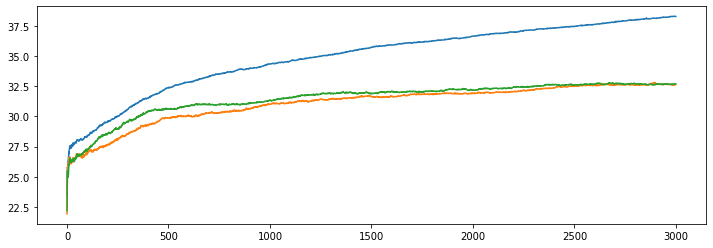

In [49]:
plt.plot(this_result_df['train_KS'])
plt.plot(this_result_df['valid_KS'])
plt.plot(this_result_df['test_KS'])

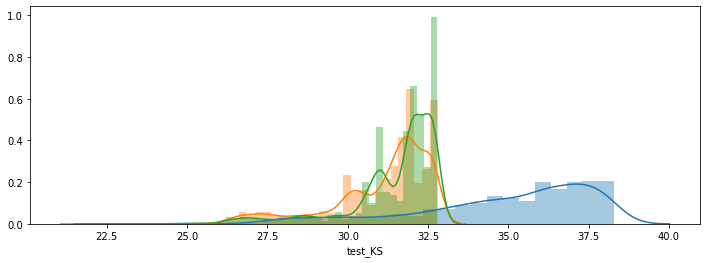

In [50]:
import seaborn as sns
sns.distplot(this_result_df['train_KS'])
sns.distplot(this_result_df['valid_KS'])
sns.distplot(this_result_df['test_KS'])

In [51]:
# 저장
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습\seg1'
this_result_df.to_excel(os.path.join(save_dir, 'AS_seg1_1000epochs_result_temp4.xlsx'), index = False)

In [52]:
this_result_df['diff_val_ks'].min()

0.0033520308015950384

In [53]:
final_df_2 = this_result_df[(this_result_df['diff_val_ks'] <= 0.10) & (this_result_df['diff_tst_ks'] <= 0.10)]

In [54]:
final_df_2

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1,23.392945,31.711937,21.918943,30.007524,22.182678,29.988403,0.063011,0.051736,0.053747,0.054350
1,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2,25.449181,34.485326,24.092211,33.037719,24.376298,32.657619,0.053321,0.042158,0.041977,0.053000
2,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,3,25.771448,34.569411,25.343437,33.736914,25.420974,33.437765,0.016608,0.013599,0.024082,0.032735
3,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,4,25.700399,34.704870,25.408311,34.123713,25.494873,33.513011,0.011365,0.007997,0.016746,0.034343
4,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,5,25.990656,35.051503,25.903534,34.453320,24.948049,33.741549,0.003352,0.040115,0.017066,0.037372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1162,34.743866,47.273950,31.317433,42.365199,31.768897,42.673358,0.098620,0.085626,0.103836,0.097318
1162,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1163,34.739837,47.275104,31.324338,42.365336,31.742561,42.673286,0.098316,0.086278,0.103855,0.097341
1163,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1164,34.756650,47.280517,31.296718,42.366815,31.730853,42.678622,0.099547,0.087057,0.103927,0.097332
1164,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1165,34.761402,47.284971,31.291259,42.367710,31.736342,42.681420,0.099827,0.087024,0.103992,0.097358


In [55]:
final_df_2 = final_df_2[final_df_2['test_KS'] == final_df_2['test_KS'].max()]

In [56]:
final_df_2

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
1161,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1162,34.743866,47.27395,31.317433,42.365199,31.768897,42.673358,0.09862,0.085626,0.103836,0.097318


In [57]:
opt_n_estimators = final_df_2['n_estimators'].tolist()[0]
opt_learning_rate = final_df_2['learning_rate'].tolist()[0]
opt_min_samples_leaf = final_df_2['min_samples_leaf'].tolist()[0]
opt_min_samples_split = final_df_2['min_samples_split'].tolist()[0]
opt_subsample = final_df_2['subsample'].tolist()[0]
opt_max_depth = final_df_2['max_depth'].tolist()[0]
opt_max_features = final_df_2['max_features'].tolist()[0]

In [58]:
final_model = GradientBoostingClassifier(
                                        n_estimators = opt_n_estimators , 
                                         learning_rate = opt_learning_rate,
                                         min_samples_leaf = opt_min_samples_leaf,
                                         min_samples_split= opt_min_samples_split,
                                         subsample=opt_subsample,
                                         max_depth =opt_max_depth,
                                         max_features= opt_max_features,
                                         random_state = 1,
                                        )

final_model.fit(X_train, np.array(y_train['BAD']))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.009, loss='deviance', max_depth=4,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.0145, min_samples_split=0.026,
                           min_weight_fraction_leaf=0.0, n_estimators=1162,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.94, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
#prob
prob_tr = final_model.predict_proba(X_train)
prob_valid = final_model.predict_proba(X_valid)
prob_test = final_model.predict_proba(X_test)
        
#Compute ks/ar
result_train = Performances(prob_tr[:, 1], y_train['BAD'])
result_valid = Performances(prob_valid[:, 1], y_valid['BAD'])
result_test = Performances(prob_test[:, 1], y_test['BAD'])

In [60]:
#Print model report:
print('Model Report')
print("Train KS : {:.5f}, / AR : {:.5f}".format(result_train.ks, result_train.ar))
print("Valid KS : {:.5f}, / AR : {:.5f}".format(result_valid.ks, result_valid.ar))
print("Test KS : {:.5f}, / AR : {:.5f}".format(result_test.ks, result_test.ar))

Model Report
Train KS : 34.74387, / AR : 47.27395
Valid KS : 31.31743, / AR : 42.36520
Test KS : 31.76890, / AR : 42.67336


In [61]:
result_valid.ks / result_train.ks

0.9013801887084796

In [62]:
final_result = get_result_df(final_model, X_train, y_train, X_valid, y_valid, X_test, y_test)

In [63]:
final_result

,ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_iter_no_change,presort,random_state,subsample,tol,validation_fraction,verbose,warm_start,n_estimators,train_KS,train_AR,valid_KS,valid_AR,test_KS,test_AR,diff_val_ks,diff_tst_ks,diff_val_ar,diff_tst_ar
0,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1,23.392945,31.711937,21.918943,30.007524,22.182678,29.988403,0.063011,0.051736,0.053747,0.054350
1,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,2,25.449181,34.485326,24.092211,33.037719,24.376298,32.657619,0.053321,0.042158,0.041977,0.053000
2,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,3,25.771448,34.569411,25.343437,33.736914,25.420974,33.437765,0.016608,0.013599,0.024082,0.032735
3,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,4,25.700399,34.704870,25.408311,34.123713,25.494873,33.513011,0.011365,0.007997,0.016746,0.034343
4,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,5,25.990656,35.051503,25.903534,34.453320,24.948049,33.741549,0.003352,0.040115,0.017066,0.037372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1158,34.746134,47.262929,31.303141,42.363725,31.761218,42.666771,0.099090,0.085906,0.103659,0.097247
1158,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1159,34.733694,47.265027,31.290777,42.362793,31.757189,42.667220,0.099123,0.085695,0.103718,0.097277
1159,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1160,34.730037,47.268757,31.290777,42.364099,31.742561,42.667598,0.099028,0.086020,0.103761,0.097340
1160,0.0,friedman_mse,None,0.009,deviance,4,5,None,0.0,None,0.0145,0.026,0.0,None,deprecated,1,0.94,0.0001,0.1,0,False,1161,34.735885,47.270490,31.304105,42.363698,31.742561,42.670008,0.098796,0.086174,0.103802,0.097322


In [64]:
# 저장
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습\seg1'
final_result.to_excel(os.path.join(save_dir, 'AS_seg1_final_result_temp4.xlsx'), index = False)

In [65]:
# KS plotting ftn
def KS_compute_with_plot(prob, data_type):

    GOOD_p = prob[data_type == 0]
    BAD_p = prob[data_type == 1]

    ks = stats.ks_2samp(GOOD_p[:, 1], BAD_p[:, 1])

    ecdf_0 = sm.distributions.ECDF(GOOD_p[:, 1])
    ecdf_1 = sm.distributions.ECDF(BAD_p[:, 1])
    plt.plot(ecdf_0.x, ecdf_0.y, label="GOOD")
    plt.plot(ecdf_1.x, ecdf_1.y, label='BAD')
    # plt.xlim(0, 0.3)

    plt.ylabel('CDF')
    plt.xlabel('p')
    plt.title('KS : {}'.format(ks[0]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    return (ks[0])

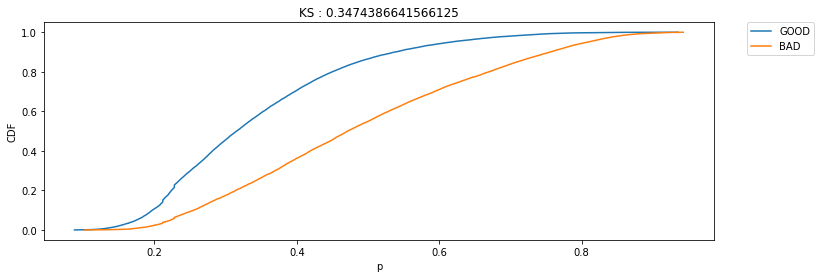

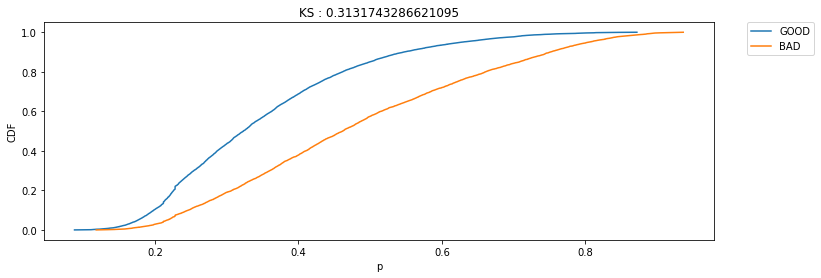

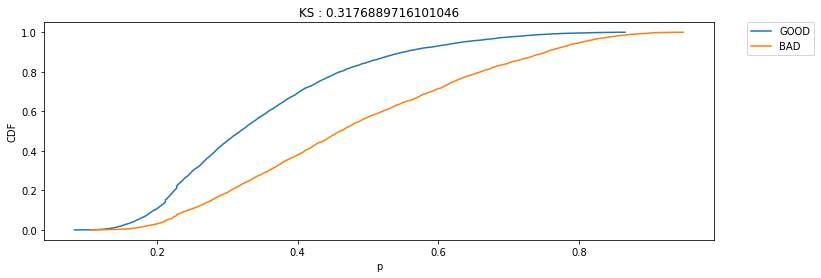

0.3176889716101046

In [66]:
KS_compute_with_plot(prob_tr, y_train['BAD'])
KS_compute_with_plot(prob_valid, y_valid['BAD'])
KS_compute_with_plot(prob_test, y_test['BAD'])

(10, 40)

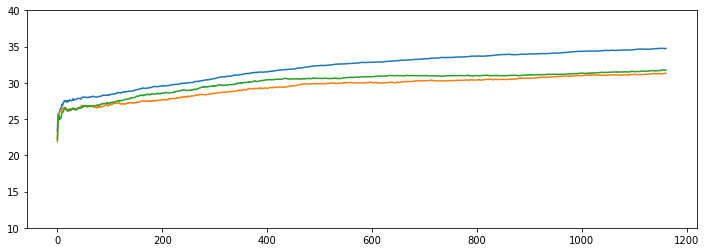

In [67]:
plt.plot(final_result['train_KS'])
plt.plot(final_result['valid_KS'])
plt.plot(final_result['test_KS'])
plt.ylim([10,40])

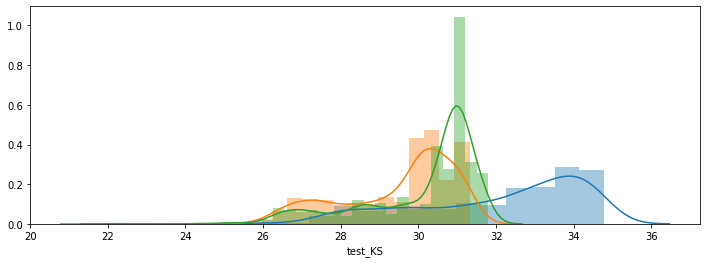

In [68]:
sns.distplot(final_result['train_KS'])
sns.distplot(final_result['valid_KS'])
sns.distplot(final_result['test_KS'])

In [69]:
print('X_train: ', X_train.shape)

X_train:  (37539, 38)


In [70]:
from sklearn.externals import joblib
# 저장
save_dir = r'D:\Seminar Documents\신용평가 세미나\복습\seg1'
model_name = save_dir + os.sep + r'AS_seg1_final_model_temp4.joblib'
joblib.dump(final_model, model_name)

['D:\\Seminar Documents\\신용평가 세미나\\복습\\seg1\\AS_seg1_final_model_temp4.joblib']